In [1]:
import pandas as pd
import time
from tqdm.notebook import tqdm

def scrape_race_results(race_id_list, pre_race_results={}):
    race_results = pre_race_results
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            url = "https://db.netkeiba.com/race/" + race_id
            race_results[race_id] = pd.read_html(url)[0]
            time.sleep(1)
        except IndexError:
            continue
        except:
            break
    return race_results

In [13]:
01:札幌,02:函館,03:福島,04:新潟,05:東京,06:中山,07:中京,08:京都,09:阪神,10:小倉

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-13-24ea1bf28f15>, line 1)

In [6]:
race_id_list = []
for place in range(1, 11, 1):
    for kai in range(1, 6, 1):
        for day in range(1, 9, 1):
            for r in range(1, 13, 1):
                race_id = (
                    "2019"
                    + str(place).zfill(2)
                    + str(kai).zfill(2)
                    + str(day).zfill(2)
                    + str(r).zfill(2)
                )
                race_id_list.append(race_id)

In [7]:
results = scrape_race_results(race_id_list)
for key in results:
    results[key].index = [key] * len(results[key])
results = pd.concat([results[key] for key in results], sort=False)
#results.to_pickle('results.pickle')

In [4]:
print(results)

              着順  枠番  馬番         馬名  性齢    斤量    騎手     タイム     着差     単勝  \
201901010101   1   1   1      ゴルコンダ  牡2  54.0  ルメール  1:48.3    NaN    1.4   
201901010101   2   3   3   プントファイヤー  牡2  54.0  岩田康誠  1:50.1      大    3.5   
201901010101   3   4   4  ラグリマスネグラス  牡2  51.0  団野大成  1:50.9      5   46.6   
201901010101   4   8   9     キタノコドウ  牡2  51.0  菅原明良  1:51.5  3.1/2   56.8   
201901010101   5   5   5   ネモフィラブルー  牡2  54.0  川島信二  1:51.7  1.1/2  140.3   
...           ..  ..  ..        ...  ..   ...   ...     ...    ...    ...   
201910020812  10   7  12  オーシャンスケイプ  牝3  52.0  大野拓弥  1:49.8    3/4   45.7   
201910020812  11   3   3     プリヴェット  牝4  55.0  藤岡康太  1:50.3      3   29.8   
201910020812  12   5   7  アドマイヤクィーン  牝4  55.0  松山弘平  1:50.3     クビ   29.6   
201910020812  13   8  13    タムロドリーム  牝3  49.0  亀田温心  1:50.4    1/2  134.8   
201910020812  14   2   2      バッカーノ  牝3  52.0  秋山真一  1:54.3      大  149.4   

                人気       馬体重       調教師  
201901010101   1.0  518(-16)  [東] 

In [5]:
results['着順'].value_counts()

4       2864
1       2863
3       2859
2       2857
5       2855
6       2853
7       2836
8       2801
9       2702
10      2553
11      2372
12      2161
13      1938
14      1702
15      1403
16      1101
4        330
1        330
6        329
3        329
2        328
5        328
7        327
8        322
9        307
10       283
11       263
12       229
中        209
17       198
13       197
18       165
14       157
除        157
15       120
取         57
16        26
17        22
2(降)       2
5(降)       1
3(降)       1
18         1
Name: 着順, dtype: int64

In [6]:
results['着順'].astype(str).value_counts()

4       3194
1       3193
3       3188
2       3185
5       3183
6       3182
7       3163
8       3123
9       3009
10      2836
11      2635
12      2390
13      2135
14      1859
15      1523
16      1127
17       220
中        209
18       166
除        157
取         57
2(降)       2
5(降)       1
3(降)       1
Name: 着順, dtype: int64

In [7]:
results2=results[~(results['着順'].astype(str).str.contains('\D'))]

In [8]:
43738-43315


423

In [9]:
209+157+57

423

In [10]:
print(results2)

              着順  枠番  馬番         馬名  性齢    斤量    騎手     タイム     着差     単勝  \
201901010101   1   1   1      ゴルコンダ  牡2  54.0  ルメール  1:48.3    NaN    1.4   
201901010101   2   3   3   プントファイヤー  牡2  54.0  岩田康誠  1:50.1      大    3.5   
201901010101   3   4   4  ラグリマスネグラス  牡2  51.0  団野大成  1:50.9      5   46.6   
201901010101   4   8   9     キタノコドウ  牡2  51.0  菅原明良  1:51.5  3.1/2   56.8   
201901010101   5   5   5   ネモフィラブルー  牡2  54.0  川島信二  1:51.7  1.1/2  140.3   
...           ..  ..  ..        ...  ..   ...   ...     ...    ...    ...   
201910020812  10   7  12  オーシャンスケイプ  牝3  52.0  大野拓弥  1:49.8    3/4   45.7   
201910020812  11   3   3     プリヴェット  牝4  55.0  藤岡康太  1:50.3      3   29.8   
201910020812  12   5   7  アドマイヤクィーン  牝4  55.0  松山弘平  1:50.3     クビ   29.6   
201910020812  13   8  13    タムロドリーム  牝3  49.0  亀田温心  1:50.4    1/2  134.8   
201910020812  14   2   2      バッカーノ  牝3  52.0  秋山真一  1:54.3      大  149.4   

                人気       馬体重       調教師  
201901010101   1.0  518(-16)  [東] 

In [11]:
results2['枠番']

201901010101    1
201901010101    3
201901010101    4
201901010101    8
201901010101    5
               ..
201910020812    7
201910020812    3
201910020812    5
201910020812    8
201910020812    2
Name: 枠番, Length: 43311, dtype: int64

In [12]:
results2['馬番']

201901010101     1
201901010101     3
201901010101     4
201901010101     9
201901010101     5
                ..
201910020812    12
201910020812     3
201910020812     7
201910020812    13
201910020812     2
Name: 馬番, Length: 43311, dtype: int64

In [13]:
results2['性齢'].value_counts()

牡3     9169
牝3     8394
牡2     4333
牡4     3969
牝2     3310
牡5     3164
牝4     3105
牝5     1952
牡6     1719
牡7      869
牝6      681
セ4      433
セ5      426
セ6      398
セ3      387
牡8      353
セ7      189
牝7      140
牡9       80
セ8       76
セ2       61
牝8       57
牡10      20
セ9        7
牝10       7
セ10       5
セ11       3
セ12       2
牡11       2
Name: 性齢, dtype: int64

In [14]:
results2['性']=results2['性齢'].map(lambda x: str(x)[0])

<ipython-input-14-bda40f468089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['性']=results2['性齢'].map(lambda x: str(x)[0])


In [15]:
results2['性']

201901010101    牡
201901010101    牡
201901010101    牡
201901010101    牡
201901010101    牡
               ..
201910020812    牝
201910020812    牝
201910020812    牝
201910020812    牝
201910020812    牝
Name: 性, Length: 43311, dtype: object

In [16]:
results2['年齢']=results2['性齢'].map(lambda x: str(x)[1:])

<ipython-input-16-13e7cf1a3b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['年齢']=results2['性齢'].map(lambda x: str(x)[1:])


In [17]:
results2['年齢']

201901010101    2
201901010101    2
201901010101    2
201901010101    2
201901010101    2
               ..
201910020812    3
201910020812    4
201910020812    4
201910020812    3
201910020812    3
Name: 年齢, Length: 43311, dtype: object

In [18]:
results2.columns

Index(['着順', '枠番', '馬番', '馬名', '性齢', '斤量', '騎手', 'タイム', '着差', '単勝', '人気',
       '馬体重', '調教師', '性', '年齢'],
      dtype='object')

In [19]:
results2['馬体重'].str.split('(',expand=True)[0].astype(int)

201901010101    518
201901010101    496
201901010101    546
201901010101    458
201901010101    436
               ... 
201910020812    414
201910020812    486
201910020812    476
201910020812    472
201910020812    458
Name: 0, Length: 43311, dtype: int32

In [20]:
results2['体重']=results2['馬体重'].str.split('(',expand=True)[0].astype(int)

<ipython-input-20-4d4386dfb30b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['体重']=results2['馬体重'].str.split('(',expand=True)[0].astype(int)


In [21]:
results2['馬体重'].str.split('(',expand=True)

,0,1
201901010101,518,-16)
201901010101,496,-8)
201901010101,546,+6)
201901010101,458,-8)
201901010101,436,0)
...,...,...
201910020812,414,+6)
201910020812,486,+2)
201910020812,476,+6)
201910020812,472,+2)


In [22]:
results2['馬体重'].str.split('(',expand=True)[1].str[:-1]

201901010101    -16
201901010101     -8
201901010101     +6
201901010101     -8
201901010101      0
               ... 
201910020812     +6
201910020812     +2
201910020812     +6
201910020812     +2
201910020812     -6
Name: 1, Length: 43311, dtype: object

In [23]:
#-1で一番最後の要素という意味なので '234'[:-1]→'23' '234'[:1]→'2'
#これの意味は[:"数字"]までの文字列を抜き出す。※[:"数字"]で指定した文字の1つ後ろの文字までを取り出すという事に注意

In [24]:
results2['体重変化']=results2['馬体重'].str.split('(',expand=True)[1].str[:-1].astype(int)

<ipython-input-24-8f0c04799838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['体重変化']=results2['馬体重'].str.split('(',expand=True)[1].str[:-1].astype(int)


In [25]:
results2['体重変化'].astype(int)

201901010101   -16
201901010101    -8
201901010101     6
201901010101    -8
201901010101     0
                ..
201910020812     6
201910020812     2
201910020812     6
201910020812     2
201910020812    -6
Name: 体重変化, Length: 43311, dtype: int32

In [26]:
results2.drop(['タイム','着差','調教師'],axis=1,inplace=True)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
results2

,着順,枠番,馬番,馬名,性齢,斤量,騎手,単勝,人気,馬体重,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1.4,1.0,518(-16),牡,2,518,-16
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,3.5,2.0,496(-8),牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,46.6,6.0,546(+6),牡,2,546,6
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,56.8,7.0,458(-8),牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,140.3,9.0,436(0),牡,2,436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,牝3,52.0,大野拓弥,45.7,10.0,414(+6),牝,3,414,6
201910020812,11,3,3,プリヴェット,牝4,55.0,藤岡康太,29.8,9.0,486(+2),牝,4,486,2
201910020812,12,5,7,アドマイヤクィーン,牝4,55.0,松山弘平,29.6,8.0,476(+6),牝,4,476,6
201910020812,13,8,13,タムロドリーム,牝3,49.0,亀田温心,134.8,12.0,472(+2),牝,3,472,2


In [28]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43311 entries, 201901010101 to 201910020812
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      43311 non-null  object 
 1   枠番      43311 non-null  int64  
 2   馬番      43311 non-null  int64  
 3   馬名      43311 non-null  object 
 4   性齢      43311 non-null  object 
 5   斤量      43311 non-null  float64
 6   騎手      43311 non-null  object 
 7   単勝      43311 non-null  object 
 8   人気      43311 non-null  float64
 9   馬体重     43311 non-null  object 
 10  性       43311 non-null  object 
 11  年齢      43311 non-null  object 
 12  体重      43311 non-null  int32  
 13  体重変化    43311 non-null  int32  
dtypes: float64(2), int32(2), int64(2), object(8)
memory usage: 3.9+ MB


In [29]:
results2['着順']=results2['着順'].astype(int)

<ipython-input-29-040df5647bf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['着順']=results2['着順'].astype(int)


In [30]:
results2['単勝']=results2['単勝'].astype(float)

<ipython-input-30-633074357581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['単勝']=results2['単勝'].astype(float)


In [31]:
results2.drop(['性齢','馬体重'],axis=1,inplace=True)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43311 entries, 201901010101 to 201910020812
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      43311 non-null  int32  
 1   枠番      43311 non-null  int64  
 2   馬番      43311 non-null  int64  
 3   馬名      43311 non-null  object 
 4   斤量      43311 non-null  float64
 5   騎手      43311 non-null  object 
 6   単勝      43311 non-null  float64
 7   人気      43311 non-null  float64
 8   性       43311 non-null  object 
 9   年齢      43311 non-null  object 
 10  体重      43311 non-null  int32  
 11  体重変化    43311 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(4)
memory usage: 3.7+ MB


In [33]:
results2['年齢']=results2['年齢'].astype(int)

<ipython-input-33-8089a0d2b0c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['年齢']=results2['年齢'].astype(int)


In [34]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43311 entries, 201901010101 to 201910020812
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      43311 non-null  int32  
 1   枠番      43311 non-null  int64  
 2   馬番      43311 non-null  int64  
 3   馬名      43311 non-null  object 
 4   斤量      43311 non-null  float64
 5   騎手      43311 non-null  object 
 6   単勝      43311 non-null  float64
 7   人気      43311 non-null  float64
 8   性       43311 non-null  object 
 9   年齢      43311 non-null  int32  
 10  体重      43311 non-null  int32  
 11  体重変化    43311 non-null  int32  
dtypes: float64(3), int32(4), int64(2), object(3)
memory usage: 3.7+ MB


In [35]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43311 entries, 201901010101 to 201910020812
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      43311 non-null  int32  
 1   枠番      43311 non-null  int64  
 2   馬番      43311 non-null  int64  
 3   馬名      43311 non-null  object 
 4   斤量      43311 non-null  float64
 5   騎手      43311 non-null  object 
 6   単勝      43311 non-null  float64
 7   人気      43311 non-null  float64
 8   性       43311 non-null  object 
 9   年齢      43311 non-null  int32  
 10  体重      43311 non-null  int32  
 11  体重変化    43311 non-null  int32  
dtypes: float64(3), int32(4), int64(2), object(3)
memory usage: 3.7+ MB


# よく使う

In [71]:
import datetime

def preprocessing(results):
    df=results.copy()
    #着順に数字以外の文字列が含まれている場合取り除く
    
    df['着順']=pd.to_numeric(df['着順'],errors='coerce')
    df.dropna(subset=['着順'],inplace=True)
    df['着順']=df['着順'].astype(int)
    #性齢を性と年齢に分ける
    df['性']=df['性齢'].map(lambda x: str(x)[0])
    df['年齢']=df['性齢'].map(lambda x: str(x)[1:]).astype(int)
    
    #馬体重を体重と体重変化に分ける
    df['体重']=df['馬体重'].str.split('(',expand=True)[0].astype(int)
    df['体重変化']=df['馬体重'].str.split('(',expand=True)[1].str[:-1].astype(int)
    
    #データをint,floatに変換
    df['単勝']=df['単勝'].astype(float)
    
    #不要な列の削除
    df.drop(['タイム','着差','調教師','性齢','馬体重'],axis=1,inplace=True)
    
    df['date']=pd.to_datetime(df['date'],format='%Y年%m月%d日')
    
    return df

In [ ]:
df=df[~(df['着順'].astype(str).str.contains('\D'))]
    df['着順']=df['着順'].astype(int)
    

In [26]:
results_addinfo=preprocessing(results_addinfo)

In [ ]:
df['着順']=pd.to_numeric(df['着順'],errors='coerce')
        df.dropna(subset=['着順'],inplace=True)
        df['着順']=df['着順'].astype(int)

In [25]:
test


,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,1800,曇,芝,良,2019-07-27,牡,2,518,-16
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,1800,曇,芝,良,2019-07-27,牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,1800,曇,芝,良,2019-07-27,牡,2,546,6
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,1800,曇,芝,良,2019-07-27,牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,1800,曇,芝,良,2019-07-27,牡,2,436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,52.0,大野拓弥,45.7,10.0,1800,曇,芝,良,2019-08-18,牝,3,414,6
201910020812,11,3,3,プリヴェット,55.0,藤岡康太,29.8,9.0,1800,曇,芝,良,2019-08-18,牝,4,486,2
201910020812,12,5,7,アドマイヤクィーン,55.0,松山弘平,29.6,8.0,1800,曇,芝,良,2019-08-18,牝,4,476,6
201910020812,13,8,13,タムロドリーム,49.0,亀田温心,134.8,12.0,1800,曇,芝,良,2019-08-18,牝,3,472,2


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43311 entries, 201901010101 to 201910020812
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   着順      43311 non-null  int32  
 1   枠番      43311 non-null  int64  
 2   馬番      43311 non-null  int64  
 3   馬名      43311 non-null  object 
 4   斤量      43311 non-null  float64
 5   騎手      43311 non-null  object 
 6   単勝      43311 non-null  float64
 7   人気      43311 non-null  float64
 8   性       43311 non-null  object 
 9   年齢      43311 non-null  int32  
 10  体重      43311 non-null  int32  
 11  体重変化    43311 non-null  int32  
dtypes: float64(3), int32(4), int64(2), object(3)
memory usage: 3.0+ MB


In [40]:
clip_rank=lambda x: x if x<4 else 4

results2['rank']= results2['着順'].map(clip_rank)

<ipython-input-40-78ee4cd62f99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results2['rank']= results2['着順'].map(clip_rank)


In [41]:
results2['rank'].value_counts()

4    33745
1     3193
3     3188
2     3185
Name: rank, dtype: int64

In [42]:
results['馬名'].value_counts()
#本当は使いたいが1万件近くあるので今回はダミー変数化しない

ラタンドレス      16
イチザティアラ     15
ワタシヲマッテル    15
トゥーフラッシー    15
キコクイーン      14
            ..
バッハスピリッツ     1
ゴッドイーサン      1
アイロニー        1
サトノアーサー      1
シゲルヒラコー      1
Name: 馬名, Length: 11401, dtype: int64

In [43]:
results['騎手'].value_counts()
#200弱なので今回ダミー変数化して使用する

和田竜二    828
三浦皇成    808
松山弘平    806
岩田康誠    780
大野拓弥    713
       ... 
阪野学       1
高松亮       1
石堂響       1
山田祥雄      1
山田雄大      1
Name: 騎手, Length: 187, dtype: int64

In [44]:
results2['性'].value_counts()

牡    23678
牝    17646
セ     1987
Name: 性, dtype: int64

In [45]:
results2.drop(['着順','馬名'],axis=1,inplace=True)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
results_d=pd.get_dummies(results2)

In [47]:
results_d


,枠番,馬番,斤量,単勝,人気,年齢,体重,体重変化,rank,騎手_アヴドゥ,...,騎手_高田潤,騎手_高野和馬,騎手_鮫島克駿,騎手_鮫島良太,騎手_黒岩悠,騎手_黛弘人,騎手_Ｍ．デム,性_セ,性_牝,性_牡
201901010101,1,1,54.0,1.4,1.0,2,518,-16,1,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,3,3,54.0,3.5,2.0,2,496,-8,2,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,4,4,51.0,46.6,6.0,2,546,6,3,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,8,9,51.0,56.8,7.0,2,458,-8,4,0,...,0,0,0,0,0,0,0,0,0,1
201901010101,5,5,54.0,140.3,9.0,2,436,0,4,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,7,12,52.0,45.7,10.0,3,414,6,4,0,...,0,0,0,0,0,0,0,0,1,0
201910020812,3,3,55.0,29.8,9.0,4,486,2,4,0,...,0,0,0,0,0,0,0,0,1,0
201910020812,5,7,55.0,29.6,8.0,4,476,6,4,0,...,0,0,0,0,0,0,0,0,1,0
201910020812,8,13,49.0,134.8,12.0,3,472,2,4,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
#ロジスティック回帰を使って予測

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=results_d.drop(['rank'],axis=1)#説明変数
y=results_d['rank']#目的変数
#stratifyの意味はrankカラムが均等にtrainとtestに割り振られるようにするため（データに偏りがあると正しい予測ができない）
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=0)

NameError: name 'results_d' is not defined

In [50]:
model = LogisticRegression()
model.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
print(model.score(X_train,y_train),model.score(X_test,y_test))

0.7791338193092984 0.7791288286901646


In [52]:
y_pred=model.predict(X_test)

In [53]:
pd.Series(y_pred).value_counts()

4    12994
dtype: int64

In [54]:
y_train.value_counts()

4    23621
1     2235
3     2232
2     2229
Name: rank, dtype: int64

In [55]:
from imblearn.under_sampling import RandomUnderSampler



In [56]:
from imblearn.under_sampling import RandomUnderSampler

rank_1=y_train.value_counts()[1]
rank_2=y_train.value_counts()[2]
rank_3=y_train.value_counts()[3]
key=[1,2,3,4]
val=[rank_1,rank_2,rank_3,rank_1]
strategy=dict(zip(key,val))
rus=RandomUnderSampler(sampling_strategy=strategy,random_state=71)
X_train_rus,y_train_rus=rus.fit_sample(X_train,y_train)

In [57]:
pd.Series(y_train_rus).value_counts()

4    2235
1    2235
3    2232
2    2229
Name: rank, dtype: int64

In [58]:
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)

print(model.score(X_train,y_train))

0.5481742916515486


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print(model.score(X_test,y_test))

0.54525165460982


In [60]:
y_pred=model.predict(X_test)

In [61]:
pred_df=pd.DataFrame({'pred':y_pred,'actual':y_test})

In [62]:
pred_df[pred_df['pred']==1]['actual'].value_counts()

4    1500
1     620
2     540
3     442
Name: actual, dtype: int64

In [63]:
len(pred_df[pred_df['pred']==1])

3102

In [64]:
pred_df[pred_df['pred']==4]['actual'].value_counts()

4    6189
3     209
2     156
1      91
Name: actual, dtype: int64

In [65]:
coefs=pd.Series(model.coef_[0],index=X.columns).sort_values()

In [66]:
coefs[['枠番', '馬番', '斤量', '単勝', '人気', '年齢', '体重', '体重変化',]]

枠番     -0.007385
馬番      0.004503
斤量      0.002982
単勝     -0.008959
人気     -0.115319
年齢     -0.023198
体重      0.001374
体重変化    0.000174
dtype: float64

In [67]:
X.columns

Index(['枠番', '馬番', '斤量', '単勝', '人気', '年齢', '体重', '体重変化', '騎手_アヴドゥ', '騎手_オドノヒ',
       ...
       '騎手_高田潤', '騎手_高野和馬', '騎手_鮫島克駿', '騎手_鮫島良太', '騎手_黒岩悠', '騎手_黛弘人',
       '騎手_Ｍ．デム', '性_セ', '性_牝', '性_牡'],
      dtype='object', length=198)

In [68]:
coefs

人気        -0.115319
年齢        -0.023198
単勝        -0.008959
枠番        -0.007385
騎手_岩田康誠   -0.003549
             ...   
騎手_武豊      0.002337
斤量         0.002982
騎手_川田将雅    0.003762
騎手_ルメール    0.004008
馬番         0.004503
Length: 198, dtype: float64

In [ ]:
#ランダムフォレストで予測

In [11]:
import requests
from bs4 import BeautifulSoup

In [70]:
race_id='201901010101'
url='https://db.netkeiba.com/race/'+race_id
html=requests.get(url)
html.encoding='EUC-JP'
soup=BeautifulSoup(html.text,'html.parser')

In [71]:

soup.find("div", attrs={"class": "data_intro"}).find_all("p")[0].text

'\n\n芝右1800m\xa0/\xa0天候 : 曇\xa0/\xa0芝 : 良\xa0/\xa0発走 : 09:50\n\n\n'

In [72]:
text=soup.find("div", attrs={"class": "data_intro"}).find_all("p")[0].text

In [17]:
#改行コードなどを取り除く
import re



In [ ]:
re.findall(r'\w+',text)

In [14]:
race_id_list=results.index.unique()

In [18]:
race_infos = {}
for race_id in tqdm(race_id_list):
    try:
        url = "https://db.netkeiba.com/race/" + race_id
        html = requests.get(url)
        html.encoding = "EUC-JP"
        soup = BeautifulSoup(html.text, "html.parser")

        texts = (
                soup.find("div", attrs={"class": "data_intro"}).find_all("p")[0].text
                + soup.find("div", attrs={"class": "data_intro"}).find_all("p")[1].text
        )
        info = re.findall(r'\w+', texts) #Qiitaでバックスラッシュを打つとバグるので大文字にしてあります。
        info_dict = {}
        for text in info:
            if text in ["芝", "ダート"]:
                info_dict["race_type"] = text
            if "障" in text:
                info_dict["race_type"] = "障害"
            if "m" in text:
                info_dict["course_len"] = int(re.findall(r"\d+", text)[0]) #ここも同様に大文字にしてます。
            if text in ["良", "稍重", "重", "不良"]:
                info_dict["ground_state"] = text
            if text in ["曇", "晴", "雨", "小雨", "小雪", "雪"]:
                info_dict["weather"] = text
            if "年" in text:
                info_dict["date"] = text
                
        race_infos[race_id] = info_dict
        time.sleep(1)
    except IndexError:
        continue
    except Exception as e:
        print(e)
        break 
    
            
       

In [22]:
#race_infos_df.to_pickle('race_infos_df.pickle')

In [19]:
#辞書型のrace_infosをDataFrameになおす
race_infos_df=pd.DataFrame(race_infos)

In [20]:
#転置する。race_idがカラムにあるのでそれを行に変換する、このあとのDataFrame同士の結合のkeyにrace_idを使うため
race_infos_df=race_infos_df.T

In [21]:
race_infos_df

,course_len,weather,race_type,ground_state,date
201901010101,1800,曇,芝,良,2019年7月27日
201901010102,1000,曇,ダート,良,2019年7月27日
201901010103,2400,曇,ダート,良,2019年7月27日
201901010104,2000,晴,芝,良,2019年7月27日
201901010105,1500,晴,芝,良,2019年7月27日
...,...,...,...,...,...
201910020808,1000,曇,ダート,稍重,2019年8月18日
201910020809,1700,曇,ダート,稍重,2019年8月18日
201910020810,1800,曇,芝,良,2019年8月18日
201910020811,1200,曇,芝,良,2019年8月18日


In [98]:
results2


,枠番,馬番,斤量,騎手,単勝,人気,性,年齢,体重,体重変化,rank
201901010101,1,1,54.0,ルメール,1.4,1.0,牡,2,518,-16,1
201901010101,3,3,54.0,岩田康誠,3.5,2.0,牡,2,496,-8,2
201901010101,4,4,51.0,団野大成,46.6,6.0,牡,2,546,6,3
201901010101,8,9,51.0,菅原明良,56.8,7.0,牡,2,458,-8,4
201901010101,5,5,54.0,川島信二,140.3,9.0,牡,2,436,0,4
...,...,...,...,...,...,...,...,...,...,...,...
201910020812,7,12,52.0,大野拓弥,45.7,10.0,牝,3,414,6,4
201910020812,3,3,55.0,藤岡康太,29.8,9.0,牝,4,486,2,4
201910020812,5,7,55.0,松山弘平,29.6,8.0,牝,4,476,6,4
201910020812,8,13,49.0,亀田温心,134.8,12.0,牝,3,472,2,4


In [23]:
#results2とrace_infos_dfを結合するhow=innerは両方のDataFrameの同じkeyがある行のみを連結する。ここでのkeyはrace_id
results_addinfo=results.merge(race_infos_df,left_index=True,right_index=True,how='inner')

In [27]:
#results_addinfo.to_pickle('results_addinfo.pickle')

In [28]:
results_addinfo

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,1800,曇,芝,良,2019-07-27,牡,2,518,-16
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,1800,曇,芝,良,2019-07-27,牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,1800,曇,芝,良,2019-07-27,牡,2,546,6
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,1800,曇,芝,良,2019-07-27,牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,1800,曇,芝,良,2019-07-27,牡,2,436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,52.0,大野拓弥,45.7,10.0,1800,曇,芝,良,2019-08-18,牝,3,414,6
201910020812,11,3,3,プリヴェット,55.0,藤岡康太,29.8,9.0,1800,曇,芝,良,2019-08-18,牝,4,486,2
201910020812,12,5,7,アドマイヤクィーン,55.0,松山弘平,29.6,8.0,1800,曇,芝,良,2019-08-18,牝,4,476,6
201910020812,13,8,13,タムロドリーム,49.0,亀田温心,134.8,12.0,1800,曇,芝,良,2019-08-18,牝,3,472,2


In [2]:
import pandas as pd
import time
from tqdm.notebook import tqdm


In [13]:
#保存していたファイルをリロードして使う
results_addinfo=pd.read_pickle('results_addinfo.pickle')

In [5]:
# dateカラムが文字列だったので、datetime64(int)に変換するためのコード
import datetime

results_addinfo['date']=pd.to_datetime(results_addinfo['date'])

In [6]:
results_addinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43311 entries, 0 to 43310
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   枠番            43311 non-null  int64         
 1   馬番            43311 non-null  int64         
 2   斤量            43311 non-null  float64       
 3   騎手            43311 non-null  object        
 4   単勝            43311 non-null  float64       
 5   人気            43311 non-null  float64       
 6   性             43311 non-null  object        
 7   年齢            43311 non-null  int64         
 8   体重            43311 non-null  int64         
 9   体重変化          43311 non-null  int64         
 10  rank          43311 non-null  int64         
 11  course_len    43311 non-null  int64         
 12  weather       43311 non-null  object        
 13  race_type     43311 non-null  object        
 14  ground_state  43311 non-null  object        
 15  date          43311 non-null  dateti

In [7]:
results_addinfo['date']

0       2019-07-27
1       2019-07-27
2       2019-07-27
3       2019-07-27
4       2019-07-27
           ...    
43306   2019-08-18
43307   2019-08-18
43308   2019-08-18
43309   2019-08-18
43310   2019-08-18
Name: date, Length: 43311, dtype: datetime64[ns]

In [8]:
#unique()で重複を消す　sortで日付順に並べる
sorted_id_list=results_addinfo.sort_values('date').index.unique()

In [9]:
round(len(sorted_id_list)*0.7)

30318

In [10]:
train_id_list=sorted_id_list[:round(len(sorted_id_list)*0.7)]
test_id_list=sorted_id_list[round(len(sorted_id_list)*0.7):]

In [11]:
train=results_addinfo.loc[train_id_list]
test=results_addinfo.loc[test_id_list]

In [12]:
len(train)

30318

In [13]:
len(test)

12993

In [14]:
len(results_addinfo)

43311

In [15]:
def split_data(df,test_size=0.3):
    sorted_id_list=df.sort_values('date').index.unique()
    train_id_list=sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list=sorted_id_list[round(len(sorted_id_list)*(1-test_size)):]
    train=df.loc[train_id_list]
    test=df.loc[test_id_list]
    return train,test

In [16]:
train,test = split_data(results_addinfo,0.3)

In [17]:
len(train)

30318

# ランダムフォレスト


In [18]:
#ダミー変数化
results_d= pd.get_dummies(results_addinfo)

In [19]:
#データをtrainとtestに分ける
train,test=split_data(results_d,0.3)

In [20]:
#データの均一化
from imblearn.under_sampling import RandomUnderSampler

rank_1=train['rank'].value_counts()[1]
rank_2=train['rank'].value_counts()[2]
rank_3=train['rank'].value_counts()[3]
key=[1,2,3,4]
val=[rank_1,rank_2,rank_3,rank_1]
strategy=dict(zip(key,val))
rus=RandomUnderSampler(sampling_strategy=strategy,random_state=71)

X_train=train.drop(['date','rank'],axis=1)
y_train=train['rank']
X_test=test.drop(['date','rank'],axis=1)
y_test=test['rank']
X_train_rus,y_train_rus=rus.fit_sample(X_train,y_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state=0)
clf.fit(X_train_rus,y_train_rus)

print(clf.score(X_train,y_train),clf.score(X_test,y_test))

0.7280163599182005 0.5312091125990919


In [22]:
results_addinfo['rank'].value_counts()

4    33745
1     3193
3     3188
2     3185
Name: rank, dtype: int64

In [23]:
random1=results_addinfo.copy()

In [ ]:
#このままだと評価しずらいので、1位、2位、3位を1、4位以下を0というデータをつくる

In [24]:
random1['rank']=random1['rank'].map(lambda x:1 if x<4 else 0)

In [25]:
random1['rank'].value_counts()

0    33745
1     9566
Name: rank, dtype: int64

In [26]:
result_d=pd.get_dummies(random1)

In [27]:
train,test=split_data(result_d)

In [28]:
X_train=train.drop(['rank','date'],axis=1)
y_train=train['rank']
X_test=test.drop(['rank','date'],axis=1)
y_test=test['rank']

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [30]:
y_pred=rf.predict_proba(X_test)[:,1]

In [31]:
#1になる確率
y_pred

array([0.06, 0.11, 0.2 , ..., 0.26, 0.03, 0.17])

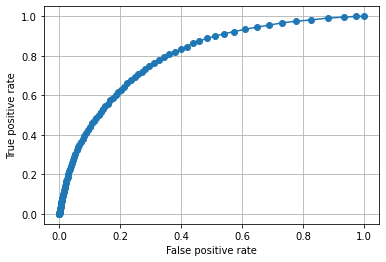

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt


fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()

#横軸は本当は0なのに1と予測してしまったもの（正解と予測が違う割合）
#縦軸は本当は1で1と予測したもの（正解と予測が合っている割合）
#thresholdsは閾値を決めている。閾値が1.0ならすべて0または1と判定するようになる。↓の図参照

In [33]:
#上の図の正確性を判別する　曲線の下部分の面積比を求める
roc_auc_score(y_test,y_pred)

0.7978230900897514

In [34]:
y_pred_train=rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred_train)
#スーパー過学習してる

1.0

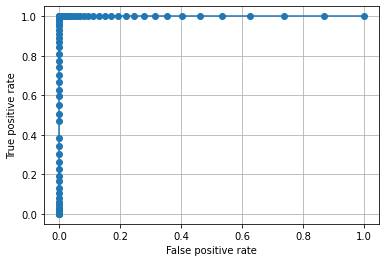

In [35]:
#過学習しているモデルでプロットするとこうなる

fpr,tpr,thresholds=roc_curve(y_train,y_pred_train)
plt.plot(fpr,tpr,marker='o')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid()
plt.show()


# パラメーターのチューニング

In [36]:
params={
    'min_samples_split':500,
    'max_depth':None,
    'n_estimators':90,#決定木の数
    'criterion':'entropy',#ジニ係数からエントロピーに変更
    #'class_weight':'balanced',不均衡データを考慮して計算してくれる1。今回は使うと予測精度が下がるので使わない
    'random_state':100
    
}
    
rf=RandomForestClassifier(**params)
rf.fit(X_train,y_train)
y_pred_train=rf.predict_proba(X_train)[:,1]
y_pred=rf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.8391047311225288
0.8072529783359583


In [37]:
importances=pd.DataFrame({'features':X_train.columns,'importance':rf.feature_importances_})

In [38]:
importances.sort_values('importance',ascending=False)
#決定木ベースの良いところは混合作用を考慮してくれるところ

,features,importance
3,単勝,0.442818
4,人気,0.328984
6,体重,0.017311
23,騎手_ルメール,0.012356
94,騎手_川田将雅,0.012228
...,...,...
78,騎手_山下雅之,0.000000
182,騎手_鈴木慶太,0.000000
188,騎手_高松亮,0.000000
16,騎手_ビュイッ,0.000000


# 勾配ブースティング木


In [39]:
import lightgbm as lgb

lgb_clf=lgb.LGBMClassifier(random_state=100)
lgb_clf.fit(X_train.values,y_train.values)#lgbは日本語のところがあるとだめなので値だけ使う
y_pred_train=lgb_clf.predict_proba(X_train)[:,1]
y_pred=lgb_clf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

0.8619315191285745
0.8044250709778372


In [117]:
params={
    'num_leaves':2,#決定木の葉の数
    'n_estimators':265,#決定木の数
    'min_data_in_leaf':1,#一つの葉っぱに含まれるデータの数をどこまでを最小にするか
    'class_weight':'balanced',#不均衡データを考慮して計算してくれる。
    'random_state':100
}

In [118]:
lgb_clf=lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values,y_train.values)#lgbは日本語のところがあるとだめなので値だけ使う
y_pred_train=lgb_clf.predict_proba(X_train)[:,1]
y_pred=lgb_clf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
0.8176244374817999
0.8122986398903986


In [ ]:
#局所的な最適解に陥っている？手動の限界なのか...
0.8107560207313365#40
0.8118961588263631#100
0.8119569725689022#110
0.8119980218451163#120
0.8120957850610017#130
0.8121357752214748#140　2番目にテストデータに対しての予測精度が高い
0.8121220067168436#144
0.8121220067168436#145 下がった
0.8121257990344964#150 下がった
0.8121253719716977#200
0.8121336569899931#250 上がった
0.8121430352890532#260　上がった テストデータに対して最も予測精度が高い(観測範囲内)
0.8120695975701835#300

In [120]:
importances=pd.DataFrame({'features':X_train.columns,'importance':lgb_clf.feature_importances_})
importances.sort_values('importance',ascending=False)[:20]

,features,importance
3,単勝,106
6,体重,17
4,人気,16
5,年齢,13
7,体重変化,8
173,騎手_藤田菜七,8
27,騎手_上野翔,7
144,騎手_的場勇人,6
107,騎手_村田一誠,5
91,騎手_嶋田純次,5


# 過去のデータを集める

In [44]:
import pandas as pd
import time
from tqdm.notebook import tqdm
import requests
from bs4 import BeautifulSoup

race_id='201901010101'
url='https://db.netkeiba.com/race/'+race_id
html=requests.get(url)
html.encoding='EUC-JP'
soup=BeautifulSoup(html.text,'html.parser')

In [45]:
import re
soup.find('table',attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/horse')})

[<a href="/horse/2017105318/" id="umalink_201901010101" title="ゴルコンダ">ゴルコンダ</a>,
 <a href="/horse/2017104612/" id="umalink_201901010101" title="プントファイヤー">プントファイヤー</a>,
 <a href="/horse/2017103879/" id="umalink_201901010101" title="ラグリマスネグラス">ラグリマスネグラス</a>,
 <a href="/horse/2017106259/" id="umalink_201901010101" title="キタノコドウ">キタノコドウ</a>,
 <a href="/horse/2017104140/" id="umalink_201901010101" title="ネモフィラブルー">ネモフィラブルー</a>,
 <a href="/horse/2017101930/" id="umalink_201901010101" title="マイネルラクスマン">マイネルラクスマン</a>,
 <a href="/horse/2017100184/" id="umalink_201901010101" title="サンモンテベロ">サンモンテベロ</a>,
 <a href="/horse/2017102953/" id="umalink_201901010101" title="エスカレーション">エスカレーション</a>,
 <a href="/horse/2017102421/" id="umalink_201901010101" title="セイウンジュリア">セイウンジュリア</a>]

In [46]:
soup.find('table',attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/jockey')})

[<a href="/jockey/05339/" title="ルメール">ルメール</a>,
 <a href="/jockey/05203/" title="岩田康誠">岩田康誠</a>,
 <a href="/jockey/01180/" title="団野大成">団野大成</a>,
 <a href="/jockey/01179/" title="菅原明良">菅原明良</a>,
 <a href="/jockey/01062/" title="川島信二">川島信二</a>,
 <a href="/jockey/01091/" title="丹内祐次">丹内祐次</a>,
 <a href="/jockey/01109/" title="黛弘人">黛弘人</a>,
 <a href="/jockey/01093/" title="藤岡佑介">藤岡佑介</a>,
 <a href="/jockey/01032/" title="池添謙一">池添謙一</a>]

In [47]:
horse_test=soup.find('table',attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/horse')})

In [48]:
#ホースidを取り出す
re.findall(r'\d+',horse_test[0]['href'])

['2017105318']

In [31]:
horse_id_list=[]
for a in horse_test:
    horse_id=re.findall(r'\d+',a['href'])
    horse_id_list.append(horse_id[0])

In [32]:
horse_id_list

['2017105318',
 '2017104612',
 '2017103879',
 '2017106259',
 '2017104140',
 '2017101930',
 '2017100184',
 '2017102953',
 '2017102421']

In [49]:
def scrape_race_results(race_id_list, pre_race_results={}):
    race_results = pre_race_results
    for race_id in tqdm(race_id_list):
        if race_id in race_results.keys():
            continue
        try:
            url = "https://db.netkeiba.com/race/" + race_id
            df= pd.read_html(url)[0]
            
            #horse_idとjockey_idをスクレイピング
            html=requests.get(url)
            html.encoding='EUC-JP'
            soup=BeautifulSoup(html.text,'html.parser')
            #horse_id
            horse_id_list=[]
            horse_a_list=\
               soup.find('table',attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/horse')})
            for a in horse_a_list:
                horse_id=re.findall(r'\d+',a['href'])
                horse_id_list.append(horse_id[0])
            #jockey_id
            jockey_id_list=[]
            jockey_a_list=\
               soup.find('table',attrs={'summary':'レース結果'}).find_all('a',attrs={'href':re.compile('^/jockey')})
            for a in jockey_a_list:
                jockey_id=re.findall(r'\d+',a['href'])
                jockey_id_list.append(jockey_id[0])
            df['horse_id']=horse_id_list
            df['jockey_id']=jockey_id_list
            race_results[race_id] = df
            time.sleep(1)
        except IndexError:
            continue
        except:
            break
    return race_results

In [56]:
results_new2=scrape_race_results(race_id_list)

In [57]:
#results_newのindexをkeyであるrace_idで置き替える。長さはレースidと同じ。race_idごとにデータフレーム化する
for key in results_new2:
    results_new2[key].index = [key] * len(results_new2[key])
#pandasのconcatでresults_newのrace_idごとにデータフレーム化されていたものを繋げていく（多分縦に）
results_new2 = pd.concat([results_new2[key] for key in results_new2], sort=False)

In [58]:
results_new2

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,horse_id,jockey_id
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,2017105318,05339
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,2017104612,05203
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,2017103879,01180
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,2017106259,01179
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,2017104140,01062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,牝3,52.0,大野拓弥,1:49.8,3/4,45.7,10.0,414(+6),[西] 西村真幸,2016104557,01096
201910020812,11,3,3,プリヴェット,牝4,55.0,藤岡康太,1:50.3,3,29.8,9.0,486(+2),[西] 今野貞一,2015101367,01116
201910020812,12,5,7,アドマイヤクィーン,牝4,55.0,松山弘平,1:50.3,クビ,29.6,8.0,476(+6),[西] 須貝尚介,2015104794,01126
201910020812,13,8,13,タムロドリーム,牝3,49.0,亀田温心,1:50.4,1/2,134.8,12.0,472(+2),[西] 西園正都,2016102212,01176


In [59]:
#results_new2.to_pickle('results_new2.pickle')

In [4]:
results_new2=pd.read_pickle('results_new2.pickle')

In [12]:
results_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43738 entries, 201901010101 to 201910020812
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   着順         43738 non-null  object 
 1   枠番         43738 non-null  int64  
 2   馬番         43738 non-null  int64  
 3   馬名         43738 non-null  object 
 4   性齢         43738 non-null  object 
 5   斤量         43738 non-null  float64
 6   騎手         43738 non-null  object 
 7   タイム        43315 non-null  object 
 8   着差         40125 non-null  object 
 9   単勝         43738 non-null  object 
 10  人気         43524 non-null  float64
 11  馬体重        43738 non-null  object 
 12  調教師        43738 non-null  object 
 13  horse_id   43738 non-null  object 
 14  jockey_id  43738 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.3+ MB


In [107]:
horse_id_list=results_p['horse_id'].unique()

In [108]:
len(horse_id_list)

11345

In [27]:
#めんどくさいので一応保存しておく。ピックルファイルでもいいがコマンドプロンプト事件も考慮してcsvファイルを作っておく
#コメント化しておかないと間違えて実行したときに大変なことになるのでコメント化しておく
#results_new2.to_csv('./results_new2.csv', index=False)

In [109]:
def scrape_horse_results(horse_id_list, pre_horse_results={}):
    horse_results = pre_horse_results
    for horse_id in tqdm(horse_id_list):
        if horse_id in horse_results.keys():
            continue
        try:
            url = "https://db.netkeiba.com/horse/" + horse_id
            df= pd.read_html(url)[3]
            
            
            horse_results[horse_id] = df
            time.sleep(1)
        except IndexError:
            continue
        except:
            break
    return horse_results

In [110]:
horse_results=scrape_horse_results(horse_id_list)

In [111]:
#results_newのindexをkeyであるrace_idで置き替える。長さはレースidと同じ。race_idごとにデータフレーム化する
for key in horse_results:
    horse_results[key].index = [key] * len(horse_results[key])
#pandasのconcatでresults_newのrace_idごとにデータフレーム化されていたものを繋げていく（多分縦に）
horse_results = pd.concat([horse_results[key] for key in horse_results], sort=False)

In [112]:
horse_results2=horse_results

In [113]:
#horse_results2.to_pickle('horse_results2.pickle')

In [19]:
import pandas as pd
import time
from tqdm.notebook import tqdm
import requests
from bs4 import BeautifulSoup

horse_results=pd.read_pickle('horse_results.pickle')

# HorseResultsクラス

In [47]:
horse_results

開催                     1中山9
開催                     5阪神5
開催                     5京都8
開催                     4阪神6
開催                     2小倉8
               ...         
date    2020-10-17 00:00:00
date    2020-10-03 00:00:00
date    2020-07-18 00:00:00
date    2020-06-27 00:00:00
date    2019-08-18 00:00:00
Length: 5580934, dtype: object

In [32]:
from tqdm.notebook import tqdm

class HorseResults:
    def __init__(self,horse_results):
        self.horse_results=horse_results[['日付','着順','賞金']]
        self.preprocessing()
        self.horse_results.rename(columns={'着順':'着順_ave','賞金':'賞金_ave',},inplace=True)
    def preprocessing(self):
        
        df=self.horse_results.copy()
        #着順に数字以外の文字列が含まれている場合すべてNANに変換してからdropnaで着順にNANが含まれる物を削除
        df['着順']=pd.to_numeric(df['着順'],errors='coerce')
        df.dropna(subset=['着順'],inplace=True)
        df['着順']=df['着順'].astype(int)
        
        df['date']=pd.to_datetime(df['日付'])
        df.drop(['日付'],axis=1,inplace=True)
        
        self.horse_results = df
        
    def average(self,horse_id_list,date):
        target_df=self.horse_results.loc[horse_id_list]
        return target_df[target_df['date']<date].groupby(level=0)[['着順_ave','賞金_ave']].mean()
    
    def merge(self,results,date):
        df=results[results['date']==date]
        horse_id_list=df['horse_id']
        merged_df=df.merge(self.average(horse_id_list,date),left_on='horse_id',right_index=True,how='left')
        return merged_df
        
    def merge_all(self,results):
        date_list=results['date'].unique()
        merged_df=pd.concat([self.merge(results,date)for date in tqdm(date_list)])
        return merged_df

In [250]:
hr=HorseResults(horse_results2)
race_results_new=hr.merge_all(results_p2)

In [251]:
#race_results_new.to_pickle('race_results_new.pickle')

In [235]:
hr.horse_results.index.nunique()

11318

In [242]:
results_p2['horse_id'].nunique()

11318

In [2]:
race_infos_df=pd.read_pickle('race_infos_df.pickle')

In [3]:
race_infos_df

,course_len,weather,race_type,ground_state,date
201901010101,1800,曇,芝,良,2019年7月27日
201901010102,1000,曇,ダート,良,2019年7月27日
201901010103,2400,曇,ダート,良,2019年7月27日
201901010104,2000,晴,芝,良,2019年7月27日
201901010105,1500,晴,芝,良,2019年7月27日
...,...,...,...,...,...
201910020808,1000,曇,ダート,稍重,2019年8月18日
201910020809,1700,曇,ダート,稍重,2019年8月18日
201910020810,1800,曇,芝,良,2019年8月18日
201910020811,1200,曇,芝,良,2019年8月18日


In [4]:
results_new2=pd.read_pickle('results_new2.pickle')

In [5]:
results_new2

,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,単勝,人気,馬体重,調教師,horse_id,jockey_id
201901010101,1,1,1,ゴルコンダ,牡2,54.0,ルメール,1:48.3,NaN,1.4,1.0,518(-16),[東] 木村哲也,2017105318,05339
201901010101,2,3,3,プントファイヤー,牡2,54.0,岩田康誠,1:50.1,大,3.5,2.0,496(-8),[東] 手塚貴久,2017104612,05203
201901010101,3,4,4,ラグリマスネグラス,牡2,51.0,団野大成,1:50.9,5,46.6,6.0,546(+6),[東] 藤沢和雄,2017103879,01180
201901010101,4,8,9,キタノコドウ,牡2,51.0,菅原明良,1:51.5,3.1/2,56.8,7.0,458(-8),[東] 高木登,2017106259,01179
201901010101,5,5,5,ネモフィラブルー,牡2,54.0,川島信二,1:51.7,1.1/2,140.3,9.0,436(0),[西] 矢作芳人,2017104140,01062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,牝3,52.0,大野拓弥,1:49.8,3/4,45.7,10.0,414(+6),[西] 西村真幸,2016104557,01096
201910020812,11,3,3,プリヴェット,牝4,55.0,藤岡康太,1:50.3,3,29.8,9.0,486(+2),[西] 今野貞一,2015101367,01116
201910020812,12,5,7,アドマイヤクィーン,牝4,55.0,松山弘平,1:50.3,クビ,29.6,8.0,476(+6),[西] 須貝尚介,2015104794,01126
201910020812,13,8,13,タムロドリーム,牝3,49.0,亀田温心,1:50.4,1/2,134.8,12.0,472(+2),[西] 西園正都,2016102212,01176


In [6]:
results_addinfo_new=results_new2.merge(race_infos_df,left_index=True,right_index=True,how='inner')

In [70]:
results_addinfo_new['horse_id'].nunique()

11401

In [72]:
test=preprocessing(results_addinfo_new)

In [73]:
results_p=test

In [156]:
results_p

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,2017105318,05339,1800,曇,芝,良,2019-07-27,牡,2,518,-16
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,2017104612,05203,1800,曇,芝,良,2019-07-27,牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,2017103879,01180,1800,曇,芝,良,2019-07-27,牡,2,546,6
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,2017106259,01179,1800,曇,芝,良,2019-07-27,牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,2017104140,01062,1800,曇,芝,良,2019-07-27,牡,2,436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,52.0,大野拓弥,45.7,10.0,2016104557,01096,1800,曇,芝,良,2019-08-18,牝,3,414,6
201910020812,11,3,3,プリヴェット,55.0,藤岡康太,29.8,9.0,2015101367,01116,1800,曇,芝,良,2019-08-18,牝,4,486,2
201910020812,12,5,7,アドマイヤクィーン,55.0,松山弘平,29.6,8.0,2015104794,01126,1800,曇,芝,良,2019-08-18,牝,4,476,6
201910020812,13,8,13,タムロドリーム,49.0,亀田温心,134.8,12.0,2016102212,01176,1800,曇,芝,良,2019-08-18,牝,3,472,2


In [163]:
results_p[results_p['horse_id'].isin([''])]

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化


In [14]:
sample_date=results_p['date'][0]

In [15]:
sample_date

Timestamp('2019-07-27 00:00:00')

In [133]:
horse_id_list=results_p['horse_id']

In [134]:
horse_id_list.nunique()

11345

In [136]:
horse_id_list2.nunique()

11318

In [172]:
results_p.loc['201901010210']['horse_id']=='2015100887'

201901010210    False
201901010210    False
201901010210     True
201901010210    False
201901010210    False
201901010210    False
201901010210    False
201901010210    False
201901010210    False
Name: horse_id, dtype: bool

In [180]:
results_p.loc['201901010210']['horse_id']=='2015100887'

201901010210    False
201901010210    False
201901010210     True
201901010210    False
201901010210    False
201901010210    False
201901010210    False
201901010210    False
201901010210    False
Name: horse_id, dtype: bool

In [181]:
results_p.loc['201901010210'].isin(['2015100887'])

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201901010210,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [241]:
results_p2=results_p[~results_p["horse_id"].isin(deleteNumber)]

In [243]:
#results_pからhorse_resultsがない馬のレース結果を消したものがresults_p2です。
#results_p2.to_pickle('results_p2.pickle')

In [238]:
#isin()はカッコ内にあるかどうかを判別するためのもの
#エラーの原因
pd.set_option('display.max_rows', 100)

horse_id_list[~(horse_id_list.isin(hr.horse_results.index))].unique()

array(['2015100887', '2015104624', '2015104882', '2016103825',
       '2014100649', '2010100960', '2015104688', '2014105493',
       '2016100893', '2016104422', '2013106119', '2015104273',
       '2015105046', '2014105535', '2015104961', '2015102367',
       '2011101125', '2017101835', '2014106201', '2014100222',
       '2008104268', '2016104505', '2014106220', '2016104458',
       '2016104867', '2017105563', '2016104532'], dtype=object)

In [239]:
deleteNumber=['2015100887', '2015104624', '2015104882', '2016103825','2014100649', '2010100960', '2015104688', '2014105493','2016100893', '2016104422', '2013106119', '2015104273','2015105046', '2014105535', '2015104961', '2015102367','2011101125', '2017101835', '2014106201', '2014100222','2008104268', '2016104505', '2014106220', '2016104458','2016104867', '2017105563','2016104532']

In [162]:
horse_results2.loc['2016104867']

日付                        NaN
開催                        NaN
天気                        NaN
R                         NaN
レース名                      NaN
映像                        NaN
頭数                        NaN
枠番                        NaN
馬番                        NaN
オッズ                       NaN
人気                        NaN
着順                        NaN
騎手                        NaN
斤量                        NaN
距離                        NaN
馬場                        NaN
馬場指数                      NaN
タイム                       NaN
着差                        NaN
ﾀｲﾑ指数                     NaN
通過                        NaN
ペース                       NaN
上り                        NaN
馬体重                       NaN
厩舎ｺﾒﾝﾄ                    NaN
備考                        NaN
勝ち馬(2着馬)                  NaN
賞金                        NaN
受賞歴         JRA最優秀2歳牝馬(2018年)
Name: 2016104867, dtype: object

In [128]:
#前処理前のhorse_resultsではエラー原因はないので前処理が問題と考えられる
horse_id_list[~(horse_id_list.isin(horse_results.index))]

Series([], Name: horse_id, dtype: object)

In [30]:
test2= horse_results[horse_results['着順']=='中'][['着順','賞金']]

In [31]:
#to_numericは整数型若しくは小数型になおす関数
pd.to_numeric(test2['着順'],errors='coerce')

2016104709   NaN
2017105833   NaN
2016101379   NaN
2016105550   NaN
2015106170   NaN
              ..
2017109148   NaN
2017109131   NaN
2014103690   NaN
2016101654   NaN
2016101654   NaN
Name: 着順, Length: 706, dtype: float64

In [38]:
target_df=hr.horse_results.loc[horse_id_list]
target_df[target_df['date']<sample_date].groupby(level=0)[['着順','賞金']].mean()

,着順,賞金
2011101773,6.104167,336.072000
2011102115,5.725806,201.150000
2011103940,4.937500,345.821429
2011106405,6.739130,374.685714
2011106466,7.241379,162.615385
...,...,...
2017105318,3.000000,180.000000
2017105993,5.000000,70.000000
2017106259,4.000000,110.000000
2017106521,11.000000,NaN


# 関数＆クラス

In [2]:
import pandas as pd
import datetime
from tqdm.notebook import tqdm
def preprocessing(results):
    df=results.copy()
    #着順に数字以外の文字列が含まれている場合取り除く
    
    df['着順']=pd.to_numeric(df['着順'],errors='coerce')
    df.dropna(subset=['着順'],inplace=True)
    df['着順']=df['着順'].astype(int)
    #性齢を性と年齢に分ける
    df['性']=df['性齢'].map(lambda x: str(x)[0])
    df['年齢']=df['性齢'].map(lambda x: str(x)[1:]).astype(int)
    
    #馬体重を体重と体重変化に分ける
    df['体重']=df['馬体重'].str.split('(',expand=True)[0].astype(int)
    df['体重変化']=df['馬体重'].str.split('(',expand=True)[1].str[:-1].astype(int)
    
    #データをint,floatに変換
    df['単勝']=df['単勝'].astype(float)
    
    #不要な列の削除
    df.drop(['タイム','着差','調教師','性齢','馬体重','馬名','騎手'],axis=1,inplace=True)
    
    df['date']=pd.to_datetime(df['date'],format='%Y年%m月%d日')
    
    return df

def split_data(df,test_size=0.3):
    sorted_id_list=df.sort_values('date').index.unique()
    train_id_list=sorted_id_list[:round(len(sorted_id_list)*(1-test_size))]
    test_id_list=sorted_id_list[round(len(sorted_id_list)*(1-test_size)):]
    train=df.loc[train_id_list].drop(['date'],axis=1)
    test=df.loc[test_id_list].drop(['date'],axis=1)
    return train,test


class HorseResults:
    def __init__(self,horse_results):
        self.horse_results=horse_results[['日付','着順','賞金']]
        self.preprocessing()
        #self.horse_results.rename(columns={'着順':'着順_ave','賞金':'賞金_ave',},inplace=True)
    def preprocessing(self):
        
        df=self.horse_results.copy()
        #着順に数字以外の文字列が含まれている場合すべてNANに変換してからdropnaで着順にNANが含まれる物を削除
        df['着順']=pd.to_numeric(df['着順'],errors='coerce')
        df.dropna(subset=['着順'],inplace=True)
        df['着順']=df['着順'].astype(int)
        
        df['date']=pd.to_datetime(df['日付'])
        df.drop(['日付'],axis=1,inplace=True)
        
        #賞金のNaNを0で埋める
        df['賞金'].fillna(0,inplace=True)
        self.horse_results = df
        
    def average(self,horse_id_list,date,n_samples='all'):
        target_df=self.horse_results.loc[horse_id_list]
        #過去何走分使うか指定
        if n_samples=='all':#n_samplesを指定しない場合、過去データをすべて使う
            filtered_df=target_df[target_df['date']<date]
        elif n_samples>0:
            #filtered_dfは過去のレース結果で絞り込み、そのあとhorse_idごとの最新の結果(n_samples)件を取り出す
            filtered_df=target_df[target_df['date']<date].sort_values('date',ascending=False).groupby(level=0).head(n_samples)
        else:#head()はマイナスの値も取れるのでマイナスを指定したらエラーを返す
            raise Exception('n_samples must be >0')
        
        average=filtered_df.groupby(level=0)[['着順','賞金']].mean()
        #format()は着順{}Rの{}内にn_sampleで指定した数値を入れてくれる
        return average.rename(columns={'着順':'着順_{}R'.format(n_samples),'賞金':'着順_{}R'.format(n_samples)})
    
    def merge(self,results,date,n_samples='all'):
        df=results[results['date']==date]
        horse_id_list=df['horse_id']
        merged_df=df.merge(self.average(horse_id_list,date,n_samples),left_on='horse_id',right_index=True,how='left')
        return merged_df
        
    def merge_all(self,results,n_samples='all'):
        date_list=results['date'].unique()
        merged_df=pd.concat([self.merge(results,date,n_samples)for date in tqdm(date_list)])
        return merged_df
    
class Return:
    def __init__(self,return_tables):
        self.return_tables = return_tables
        #今回は3着以内を予測しているので、とりあえず複勝の勝った馬の馬番号と払い戻し額だけを使う
        
        
    @property
    def fukusho(self):
        fukusho=self.return_tables[return_tables[0]=='複勝'][[1,2]]#1が馬番号、2が払い戻し額
        wins=fukusho[1].str.split('br',expand=True).drop([3],axis=1)
        wins.columns=['win_0','win_1','win_2']
        returns=fukusho[2].str.split('br',expand=True).drop([3],axis=1)
        returns.columns=['return_0','return_1','return_2']
        
        df=pd.concat([wins,returns],axis=1)
        #axisはデフォルトだと0に設定されており、0は縦に結合、1だと横に結合
        for column in df.columns:
            df[column]=df[column].str.replace(',','')
            #''の中に何も入力しないと置き替えではなく取り除かれるだけ
        return df.fillna(0)

In [2]:
results_p2=pd.read_pickle('results_p2.pickle')
#results_p2に関しては過去の馬のレース結果がない馬の分のレースを削除するという処理を行ってある
horse_results2=pd.read_pickle('horse_results2.pickle')

In [18]:
results_p2

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,2017105318,05339,1800,曇,芝,良,2019-07-27,牡,2,518,-16
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,2017104612,05203,1800,曇,芝,良,2019-07-27,牡,2,496,-8
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,2017103879,01180,1800,曇,芝,良,2019-07-27,牡,2,546,6
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,2017106259,01179,1800,曇,芝,良,2019-07-27,牡,2,458,-8
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,2017104140,01062,1800,曇,芝,良,2019-07-27,牡,2,436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201910020812,10,7,12,オーシャンスケイプ,52.0,大野拓弥,45.7,10.0,2016104557,01096,1800,曇,芝,良,2019-08-18,牝,3,414,6
201910020812,11,3,3,プリヴェット,55.0,藤岡康太,29.8,9.0,2015101367,01116,1800,曇,芝,良,2019-08-18,牝,4,486,2
201910020812,12,5,7,アドマイヤクィーン,55.0,松山弘平,29.6,8.0,2015104794,01126,1800,曇,芝,良,2019-08-18,牝,4,476,6
201910020812,13,8,13,タムロドリーム,49.0,亀田温心,134.8,12.0,2016102212,01176,1800,曇,芝,良,2019-08-18,牝,3,472,2


In [3]:
hr=HorseResults(horse_results2)


In [4]:
deleteNumber=['2015100887', '2015104624', '2015104882', '2016103825','2014100649', '2010100960', '2015104688', '2014105493','2016100893', '2016104422', '2013106119', '2015104273','2015105046', '2014105535', '2015104961', '2015102367','2011101125', '2017101835', '2014106201', '2014100222','2008104268', '2016104505', '2014106220', '2016104458','2016104867', '2017105563','2016104532']

In [5]:
race_infos_df=pd.read_pickle('race_infos_df.pickle')
results_new2=pd.read_pickle('results_new2.pickle')
results_addinfo_new=results_new2.merge(race_infos_df,left_index=True,right_index=True,how='inner')
results_p=preprocessing(results_addinfo_new)
results_p2=results_p[~results_p["horse_id"].isin(deleteNumber)]

In [6]:
hr.merge_all(results_p2)

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,...,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_ave,賞金_ave
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,2017105318,05339,...,曇,芝,良,2019-07-27,牡,2,518,-16,3.000000,180.000000
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,2017104612,05203,...,曇,芝,良,2019-07-27,牡,2,496,-8,2.000000,280.000000
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,2017103879,01180,...,曇,芝,良,2019-07-27,牡,2,546,6,10.000000,NaN
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,2017106259,01179,...,曇,芝,良,2019-07-27,牡,2,458,-8,4.000000,110.000000
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,2017104140,01062,...,曇,芝,良,2019-07-27,牡,2,436,0,9.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201908040412,5,5,5,エムオーグリッタ,57.0,津村明秀,15.4,7.0,2014102848,01092,...,晴,ダート,重,2019-10-13,牡,5,492,-10,5.904762,401.816667
201908040412,6,2,2,ウインユニファイド,57.0,松山弘平,36.0,9.0,2012100555,01126,...,晴,ダート,重,2019-10-13,牡,7,526,2,6.111111,441.615000
201908040412,7,1,1,カレンカカ,57.0,三浦皇成,7.2,4.0,2014105543,01122,...,晴,ダート,重,2019-10-13,牡,5,498,-4,4.000000,381.164706
201908040412,8,4,4,メイショウタチマチ,55.0,岡田祥嗣,23.9,8.0,2013103613,05429,...,晴,ダート,重,2019-10-13,牝,6,504,0,4.357143,481.257895


In [ ]:
#過去のレースすべての結果を全部使って平均を出すのではなく、最近の何レースかを取り出して平均する

In [7]:
hr.horse_results

,着順_ave,賞金_ave,date
2017105318,4,110.0,2020-08-02
2017105318,6,NaN,2019-08-31
2017105318,1,500.0,2019-07-27
2017105318,3,180.0,2019-06-09
2017104612,1,760.0,2020-09-19
...,...,...,...
2017104899,7,NaN,2020-10-17
2017104899,6,NaN,2020-10-03
2017104899,14,NaN,2020-07-18
2017104899,8,NaN,2020-06-27


In [9]:
#日付の新しい順に並べる
sample=hr.horse_results
sample.sort_values('date',ascending=False)

,着順_ave,賞金_ave,date
2016105189,16,NaN,2020-11-08
2017102118,1,1100.0,2020-11-08
2016104677,9,NaN,2020-11-08
2013102530,1,25.0,2020-11-08
2015101447,5,182.0,2020-11-08
...,...,...,...
2007100107,2,200.0,2010-07-03
2007100107,4,75.0,2010-06-19
2007100107,7,NaN,2010-05-02
2007100107,2,200.0,2010-04-17


In [ ]:
#horse_idごとに新しいレース結果3つを取り出す

In [10]:
#groupby(level=0)はindex(今回のindexはhorse_id)ごとにgroupbyを実行するという意味
sample.sort_values('date',ascending=False).groupby(level=0).head(3)

,着順_ave,賞金_ave,date
2016105189,16,NaN,2020-11-08
2017102118,1,1100.0,2020-11-08
2016104677,9,NaN,2020-11-08
2013102530,1,25.0,2020-11-08
2015101447,5,182.0,2020-11-08
...,...,...,...
2014110013,8,NaN,2017-05-28
2014104859,9,NaN,2017-05-21
2014101206,1,500.0,2017-05-20
2014105614,5,100.0,2017-05-13


In [12]:
#ちゃんとhorse_idごとに上から3つ取り出せているか確認
test5=sample.sort_values('date',ascending=False).groupby(level=0).head(3)
test5.sort_index()

,着順_ave,賞金_ave,date
2007100107,11,NaN,2018-12-16
2007100107,10,NaN,2019-03-23
2007100107,7,NaN,2019-02-02
2008100889,10,NaN,2019-02-09
2008100889,6,NaN,2019-06-16
...,...,...,...
2017110173,6,NaN,2020-08-22
2017110173,3,190.0,2020-07-25
2017110175,3,7.0,2020-10-08
2017110175,7,NaN,2020-09-24


In [13]:
#新しいレース結果3つを取り出せているかを元のデータからサンプルのhorse_idを取り出して確認
sample.loc['2007100107']

,着順_ave,賞金_ave,date
2007100107,10,NaN,2019-03-23
2007100107,7,NaN,2019-02-02
2007100107,11,NaN,2018-12-16
2007100107,14,NaN,2018-11-24
2007100107,1,780.0,2017-05-13
2007100107,8,NaN,2017-01-14
2007100107,2,280.0,2015-10-04
2007100107,7,NaN,2015-08-30
2007100107,9,NaN,2015-07-26
2007100107,9,NaN,2015-06-21


In [15]:
test5.loc['2007100107']

,着順_ave,賞金_ave,date
2007100107,10,NaN,2019-03-23
2007100107,7,NaN,2019-02-02
2007100107,11,NaN,2018-12-16


In [25]:
#新しく更新した関数のチェック
hr=HorseResults(horse_results2)
results_3R=hr.merge_all(results_p2, n_samples=3)
results_3R.head()

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,...,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_3R,着順_3R
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,2017105318,05339,...,曇,芝,良,2019-07-27,牡,2,518,-16,3.0,180.0
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,2017104612,05203,...,曇,芝,良,2019-07-27,牡,2,496,-8,2.0,280.0
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,2017103879,01180,...,曇,芝,良,2019-07-27,牡,2,546,6,10.0,0.0
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,2017106259,01179,...,曇,芝,良,2019-07-27,牡,2,458,-8,4.0,110.0
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,2017104140,01062,...,曇,芝,良,2019-07-27,牡,2,436,0,9.0,0.0


In [26]:
results_3R[results_3R['horse_id']=='2007100107']

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,...,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_3R,着順_3R
201907010505,7,1,1,マックスドリーム,60.0,白浜雄造,37.6,11.0,2007100107,01035,...,晴,障害,良,2019-02-02,セ,12,552,4,8.666667,260.0
201906030108,10,8,11,マックスドリーム,60.0,平沢健治,60.7,7.0,2007100107,01067,...,小雨,障害,稍重,2019-03-23,セ,12,536,-16,10.666667,0.0


# 精度比較

In [27]:
hr=HorseResults(horse_results2)
results_5R=hr.merge_all(results_p2, n_samples=5)
results_5R.head()

,着順,枠番,馬番,馬名,斤量,騎手,単勝,人気,horse_id,jockey_id,...,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_5R,着順_5R
201901010101,1,1,1,ゴルコンダ,54.0,ルメール,1.4,1.0,2017105318,05339,...,曇,芝,良,2019-07-27,牡,2,518,-16,3.0,180.0
201901010101,2,3,3,プントファイヤー,54.0,岩田康誠,3.5,2.0,2017104612,05203,...,曇,芝,良,2019-07-27,牡,2,496,-8,2.0,280.0
201901010101,3,4,4,ラグリマスネグラス,51.0,団野大成,46.6,6.0,2017103879,01180,...,曇,芝,良,2019-07-27,牡,2,546,6,10.0,0.0
201901010101,4,8,9,キタノコドウ,51.0,菅原明良,56.8,7.0,2017106259,01179,...,曇,芝,良,2019-07-27,牡,2,458,-8,4.0,110.0
201901010101,5,5,5,ネモフィラブルー,54.0,川島信二,140.3,9.0,2017104140,01062,...,曇,芝,良,2019-07-27,牡,2,436,0,9.0,0.0


In [31]:
#map関数で3着以内なら1、4着以降は0と変換する
results_5R['rank'] = results_5R['着順'].map(lambda x:1 if x<4 else 0)
results_5R.drop(['着順','騎手','horse_id'],axis=1,inplace=True)
results_5R.head()

KeyError: '着順'

In [32]:
results_5R.drop(['馬名'],axis=1,inplace=True)

In [33]:
results_5R.head()

,枠番,馬番,斤量,単勝,人気,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_5R,着順_5R,rank
201901010101,1,1,54.0,1.4,1.0,05339,1800,曇,芝,良,2019-07-27,牡,2,518,-16,3.0,180.0,1
201901010101,3,3,54.0,3.5,2.0,05203,1800,曇,芝,良,2019-07-27,牡,2,496,-8,2.0,280.0,1
201901010101,4,4,51.0,46.6,6.0,01180,1800,曇,芝,良,2019-07-27,牡,2,546,6,10.0,0.0,1
201901010101,8,9,51.0,56.8,7.0,01179,1800,曇,芝,良,2019-07-27,牡,2,458,-8,4.0,110.0,0
201901010101,5,5,54.0,140.3,9.0,01062,1800,曇,芝,良,2019-07-27,牡,2,436,0,9.0,0.0,0


In [35]:
#カテゴリー変数をpd.get_dummiesでダミー変数化する
results_d=pd.get_dummies(results_5R)
results_d.head()

,枠番,馬番,斤量,単勝,人気,date,年齢,体重,体重変化,着順_5R,...,race_type_ダート,race_type_芝,race_type_障害,ground_state_不良,ground_state_稍重,ground_state_良,ground_state_重,性_セ,性_牝,性_牡
201901010101,1,1,54.0,1.4,1.0,2019-07-27,2,518,-16,3.0,...,0,1,0,0,0,1,0,0,0,1
201901010101,3,3,54.0,3.5,2.0,2019-07-27,2,496,-8,2.0,...,0,1,0,0,0,1,0,0,0,1
201901010101,4,4,51.0,46.6,6.0,2019-07-27,2,546,6,10.0,...,0,1,0,0,0,1,0,0,0,1
201901010101,8,9,51.0,56.8,7.0,2019-07-27,2,458,-8,4.0,...,0,1,0,0,0,1,0,0,0,1
201901010101,5,5,54.0,140.3,9.0,2019-07-27,2,436,0,9.0,...,0,1,0,0,0,1,0,0,0,1


In [37]:
train,test= split_data(results_d)

In [39]:
#trainデータは説明変数は元データから'rank'を取り除いたもの、目的変数は'rank'
X_train=train.drop(['rank'],axis=1)
y_train=train['rank']
#testデータも同様、説明変数は元データから'rank'を取り除いたもの、目的変数は'rank'
X_test=test.drop(['rank'],axis=1)
y_test=test['rank']
X_train.head()

,枠番,馬番,斤量,単勝,人気,年齢,体重,体重変化,着順_5R,着順_5R,...,race_type_ダート,race_type_芝,race_type_障害,ground_state_不良,ground_state_稍重,ground_state_良,ground_state_重,性_セ,性_牝,性_牡
201908010105,7,14,56.0,1.5,1.0,3,490,0,NaN,NaN,...,0,1,0,0,0,1,0,0,0,1
201908010105,2,4,54.0,18.9,5.0,3,474,0,NaN,NaN,...,0,1,0,0,0,1,0,0,1,0
201908010105,1,2,53.0,18.1,4.0,3,464,0,NaN,NaN,...,0,1,0,0,0,1,0,0,1,0
201908010105,4,7,56.0,5.5,2.0,3,456,0,NaN,NaN,...,0,1,0,0,0,1,0,0,0,1
201908010105,8,16,54.0,115.6,12.0,3,398,0,NaN,NaN,...,0,1,0,0,0,1,0,0,1,0


In [41]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

params={
    'num_leaves':2,#決定木の葉の数
    'n_estimators':265,#決定木の数
    'min_data_in_leaf':1,#一つの葉っぱに含まれるデータの数をどこまでを最小にするか
    'class_weight':'balanced',#不均衡データを考慮して計算してくれる。
    'random_state':100
}

lgb_clf=lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values,y_train.values)#lgbは日本語のところがあるとだめなので値だけ使う
y_pred_train=lgb_clf.predict_proba(X_train)[:,1]
y_pred=lgb_clf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
0.8179183135155088
0.8116796590433856


In [42]:
#予測結果は若干下がったがfeaturesImportanceにしっかりと着順_5Rが使われている
#以前のモデルは'単勝'が予測にもっとも寄与していたが、今回はそれが若干緩和された
#つまりオッズの低いところばかりにかけなくなり、回収率の向上が予測できる
importances=pd.DataFrame({'features':X_train.columns,'importance':lgb_clf.feature_importances_})
importances.sort_values('importance',ascending=False)[:20]

,features,importance
3,単勝,97
8,着順_5R,24
4,人気,15
5,年齢,13
6,体重,13
9,着順_5R,13
130,jockey_id_01164,8
7,体重変化,7
69,jockey_id_01087,6
82,jockey_id_01108,5


# 払い戻しデータのスクレイピング

In [33]:
import pandas as pd

url="https://db.netkeiba.com/race/201902010101"
pd.read_html(url)[1]

,0,1,2,3
0,単勝,12,400,3
1,複勝,1257,130140110,231
2,枠連,3 - 6,1020,5
3,馬連,5 - 12,850,3


複勝のところの数値が繋がって出力されているのでこれをどうにかしていく

In [34]:
from urllib.request import urlopen

f=urlopen(url)
html=f.read()

In [ ]:
html
#実行すると、とてつもなく長いデータが表示されるので実際に見つける作業の時のみ実行して見つけたら消すかコメントアウトしておくと良い
#CTRL+Fで130を探す。<br />が省略されているので、繋がってしまっている。

In [35]:
html=html.replace(b'<br />',b'br')
#よってreplace()で置き替える。

In [36]:
pd.read_html(url)[2]

,0,1,2,3
0,ワイド,5 - 127 - 125 - 7,360240270,412
1,馬単,12 → 5,1720,7
2,三連複,5 - 7 - 12,890,1
3,三連単,12 → 5 → 7,4990,7


In [37]:
pd.concat([pd.read_html(html)[1],pd.read_html(html)[2]])
#[1]に単勝から馬連まで、[2]にワイドから3連単が入っているのでのでconcatっで結合する

,0,1,2,3
0,単勝,12,400,3
1,複勝,12br5br7,130br140br110,2br3br1
2,枠連,3 - 6,1020,5
3,馬連,5 - 12,850,3
0,ワイド,5 - 12br7 - 12br5 - 7,360br240br270,4br1br2
1,馬単,12 → 5,1720,7
2,三連複,5 - 7 - 12,890,1
3,三連単,12 → 5 → 7,4990,7


In [38]:
import pandas as pd
import time
from tqdm.notebook import tqdm
from urllib.request import urlopen

def scrape_return_tables(race_id_list, pre_return_tables={}):
    return_tables = pre_return_tables
    for race_id in tqdm(race_id_list):
        if race_id in return_tables.keys():
            continue
        try:
            url = "https://db.netkeiba.com/race/" + race_id
            f=urlopen(url)
            html=f.read()
            html=html.replace(b'<br />',b'br')
            dfs=pd.read_html(html)
            #dfsに格納することで次のコードで、read_html[1],[2]をそのまま処理するよりも処理を軽くできる
            #（そのまま書くとread_htmlの処理を2回行うことになるため）
            return_tables[race_id] = pd.concat([dfs[1],dfs[2]])
            time.sleep(1)
        except IndexError:
            continue
        except:
            break
    return return_tables

In [39]:
deleteNumber=['2015100887', '2015104624', '2015104882', '2016103825','2014100649', '2010100960', '2015104688', '2014105493','2016100893', '2016104422', '2013106119', '2015104273','2015105046', '2014105535', '2015104961', '2015102367','2011101125', '2017101835', '2014106201', '2014100222','2008104268', '2016104505', '2014106220', '2016104458','2016104867', '2017105563','2016104532']

In [40]:
results_new2=pd.read_pickle('results_new2.pickle')
race_infos_df=pd.read_pickle('race_infos_df.pickle')
results_addinfo_new=results_new2.merge(race_infos_df,left_index=True,right_index=True,how='inner')
results_p=preprocessing(results_addinfo_new)
results_p2=results_p[~results_p["horse_id"].isin(deleteNumber)]
train,test=split_data(results_p)

In [41]:
race_id_list=test.index.unique()
race_id_list

Index(['201906040209', '201906040204', '201909040212', '201906040205',
       '201906040210', '201906040211', '201906040212', '201909040201',
       '201909040202', '201909040203',
       ...
       '201909050804', '201909050806', '201909050807', '201909050802',
       '201909050803', '201909050811', '201909050810', '201909050812',
       '201909050808', '201909050809'],
      dtype='object', length=956)

In [12]:
test=scrape_return_tables(race_id_list[:4])
#試しに4つだけとってみる

In [12]:
test

,着順,枠番,馬番,斤量,単勝,人気,horse_id,jockey_id,course_len,weather,race_type,ground_state,性,年齢,体重,体重変化
201906040209,1,5,5,54.0,1.5,1.0,2016104319,01075,2000,曇,芝,良,牡,3,462,-2
201906040209,2,7,7,57.0,12.7,4.0,2015104299,01043,2000,曇,芝,良,牡,4,476,4
201906040209,3,3,3,55.0,45.6,7.0,2014100717,01009,2000,曇,芝,良,牝,5,430,0
201906040209,4,8,8,52.0,8.0,3.0,2016104029,05386,2000,曇,芝,良,牝,3,462,2
201906040209,5,8,9,57.0,20.0,6.0,2014102038,05212,2000,曇,芝,良,セ,5,430,-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201909050809,9,6,8,54.0,30.5,9.0,2017102638,01141,1600,曇,芝,良,牝,2,482,12
201909050809,10,4,4,54.0,50.9,10.0,2017104739,01112,1600,曇,芝,良,牝,2,406,-8
201909050809,11,3,3,54.0,264.0,12.0,2017103195,05588,1600,曇,芝,良,牝,2,410,-6
201909050809,12,7,10,55.0,401.1,13.0,2017103394,01133,1600,曇,芝,良,牡,2,432,-10


In [54]:
return_tables=scrape_return_tables(race_id_list)

In [55]:
for key in return_tables:
    return_tables[key].index = [key] * len(return_tables[key])
return_tables = pd.concat([return_tables[key] for key in return_tables], sort=False)
#return_tables.to_pickle('return_tables.pickle')

カラムの1はどの馬番号が勝ったか、2は払い戻し額、3は勝った馬が何番人気だったか

このままではまだ使えないのでクラスを作って処理をしていく

In [42]:
return_tables=pd.read_pickle('return_tables.pickle')

# Returnクラス

In [43]:
class Return:
    def __init__(self,return_tables):
        self.return_tables = return_tables
        #今回は3着以内を予測しているので、とりあえず複勝の勝った馬の馬番号と払い戻し額だけを使う
        #self.fukusho=self.return_tables[return_tables[0]=='複勝'][[1,2]]#1が馬番号、2が払い戻し額
        
    @property
    def fukusho(self):
        fukusho=self.return_tables[return_tables[0]=='複勝'][[1,2]]#1が馬番号、2が払い戻し額
        wins=fukusho[1].str.split('br',expand=True).drop([3],axis=1)
        wins.columns=['win_0','win_1','win_2']
        returns=fukusho[2].str.split('br',expand=True).drop([3],axis=1)
        returns.columns=['return_0','return_1','return_2']
        
        df=pd.concat([wins,returns],axis=1)
        #axisはデフォルトだと0に設定されており、0は縦に結合、1だと横に結合
        for column in df.columns:
            df[column]=df[column].str.replace(',','')
            #''の中に何も入力しないと置き替えではなく取り除かれるだけ
        return df.fillna(0).astype(int)

In [25]:
rt=Return(return_tables)
rt.fukusho.head()

,1,2
201906040209,5br7br3,110br220br380
201906040204,4br6br10,210br350br290
201909040212,15br16br5,140br470br250
201906040205,7br6br14,110br340br140
201906040210,8br2br4,200br270br640


まだこのままでは使えないのでreplace()で置き替えたbrという区切り文字をstr.split()を使って分けていく.
このままだlist型なのでexpand=Trueとしてデータフレーム型にする

In [26]:
rt.fukusho[1].str.split('br',expand=True).drop([3],axis=1)

,0,1,2
201906040209,5,7,3
201906040204,4,6,10
201909040212,15,16,5
201906040205,7,6,14
201906040210,8,2,4
...,...,...,...
201909050811,11,9,1
201909050810,5,4,14
201909050812,10,5,7
201909050808,13,11,9


In [42]:
rt=Return(return_tables)
rt.fukusho

,win_0,win_1,win_2,return_0,return_1,return_2
201906040209,5,7,3,110,220,380
201906040204,4,6,10,210,350,290
201909040212,15,16,5,140,470,250
201906040205,7,6,14,110,340,140
201906040210,8,2,4,200,270,640
...,...,...,...,...,...,...
201909050811,11,9,1,320,290,160
201909050810,5,4,14,240,300,150
201909050812,10,5,7,230,310,450
201909050808,13,11,9,160,560,150


In [29]:
rt.fukusho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 201906040209 to 201909050809
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   win_0     956 non-null    object
 1   win_1     956 non-null    object
 2   win_2     930 non-null    object
 3   return_0  956 non-null    object
 4   return_1  956 non-null    object
 5   return_2  930 non-null    object
dtypes: object(6)
memory usage: 52.3+ KB


文字列型になっているので整数型に変換する

In [30]:
rt.fukusho.astype(int)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

欠損値確認

In [31]:
rt.fukusho.isnull().sum()

win_0        0
win_1        0
win_2       26
return_0     0
return_1     0
return_2    26
dtype: int64

In [32]:
rt.fukusho[rt.fukusho['win_2'].isnull()]

,win_0,win_1,win_2,return_0,return_1,return_2
201909040205,2,1,None,100,180,None
201909040309,1,4,None,100,130,None
201909040401,3,1,None,110,160,None
201909040404,5,4,None,200,130,None
201909040609,6,3,None,830,400,None
201906040708,4,6,None,130,170,None
201909040803,4,1,None,190,500,None
201905040108,6,4,None,170,300,None
201904030111,5,2,None,150,110,None
201908040206,2,7,None,110,150,None


ページを直接確認した結果もともと複勝が2つしかないのでスクレイピング漏れではなさそう
欠損値を埋める。馬番号0はないので0で埋めれば問題なさそう

In [37]:
rt.fukusho.astype(int)

ValueError: invalid literal for int() with base 10: '1,010'

今度は桁が4桁になったときのカンマが文字列型のカンマとして扱われているので変換できない
replace()でカンマを取り除く。（置き替え以外の使い方もある）

In [44]:
rt=Return(return_tables)
rt.fukusho

,win_0,win_1,win_2,return_0,return_1,return_2
201906040209,5,7,3,110,220,380
201906040204,4,6,10,210,350,290
201909040212,15,16,5,140,470,250
201906040205,7,6,14,110,340,140
201906040210,8,2,4,200,270,640
...,...,...,...,...,...,...
201909050811,11,9,1,320,290,160
201909050810,5,4,14,240,300,150
201909050812,10,5,7,230,310,450
201909050808,13,11,9,160,560,150


In [58]:
rt.fukusho.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 201906040209 to 201909050809
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   win_0     956 non-null    int32
 1   win_1     956 non-null    int32
 2   win_2     956 non-null    int32
 3   return_0  956 non-null    int32
 4   return_1  956 non-null    int32
 5   return_2  956 non-null    int32
dtypes: int32(6)
memory usage: 29.9+ KB


整数型になったのでとりあえずok

# 回収率計算

In [13]:
horse_results2=pd.read_pickle('horse_results2.pickle')
hr=HorseResults(horse_results2)

In [14]:
results_5R=hr.merge_all(results_p2,n_samples=5)
results_5R.head()

,着順,枠番,馬番,斤量,単勝,人気,horse_id,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_5R,着順_5R
201901010101,1,1,1,54.0,1.4,1.0,2017105318,05339,1800,曇,芝,良,2019-07-27,牡,2,518,-16,3.0,180.0
201901010101,2,3,3,54.0,3.5,2.0,2017104612,05203,1800,曇,芝,良,2019-07-27,牡,2,496,-8,2.0,280.0
201901010101,3,4,4,51.0,46.6,6.0,2017103879,01180,1800,曇,芝,良,2019-07-27,牡,2,546,6,10.0,0.0
201901010101,4,8,9,51.0,56.8,7.0,2017106259,01179,1800,曇,芝,良,2019-07-27,牡,2,458,-8,4.0,110.0
201901010101,5,5,5,54.0,140.3,9.0,2017104140,01062,1800,曇,芝,良,2019-07-27,牡,2,436,0,9.0,0.0


In [15]:
results_5R['rank']=results_5R['着順'].map(lambda x:1 if x<4 else 0)
results_5R.drop(['着順','horse_id'],axis=1,inplace=True)
results_5R.head()

,枠番,馬番,斤量,単勝,人気,jockey_id,course_len,weather,race_type,ground_state,date,性,年齢,体重,体重変化,着順_5R,着順_5R,rank
201901010101,1,1,54.0,1.4,1.0,05339,1800,曇,芝,良,2019-07-27,牡,2,518,-16,3.0,180.0,1
201901010101,3,3,54.0,3.5,2.0,05203,1800,曇,芝,良,2019-07-27,牡,2,496,-8,2.0,280.0,1
201901010101,4,4,51.0,46.6,6.0,01180,1800,曇,芝,良,2019-07-27,牡,2,546,6,10.0,0.0,1
201901010101,8,9,51.0,56.8,7.0,01179,1800,曇,芝,良,2019-07-27,牡,2,458,-8,4.0,110.0,0
201901010101,5,5,54.0,140.3,9.0,01062,1800,曇,芝,良,2019-07-27,牡,2,436,0,9.0,0.0,0


In [16]:
results_d=pd.get_dummies(results_5R)
train,test=split_data(results_d)
#trainデータは説明変数は元データから'rank'を取り除いたもの、目的変数は'rank'
X_train=train.drop(['rank'],axis=1)
y_train=train['rank']
#testデータも同様、説明変数は元データから'rank'を取り除いたもの、目的変数は'rank'
X_test=test.drop(['rank'],axis=1)
y_test=test['rank']

split_data()は不均衡データを均等に分けるために作ったが、from sklearn.model_selection import train_test_splitのstratifyを指定してうまくいけば今後はそちらを使うように変更していく

In [17]:
X_train.head()

,枠番,馬番,斤量,単勝,人気,年齢,体重,体重変化,着順_5R,着順_5R,...,race_type_ダート,race_type_芝,race_type_障害,ground_state_不良,ground_state_稍重,ground_state_良,ground_state_重,性_セ,性_牝,性_牡
201908010105,7,14,56.0,1.5,1.0,3,490,0,NaN,NaN,...,0,1,0,0,0,1,0,0,0,1
201908010105,2,4,54.0,18.9,5.0,3,474,0,NaN,NaN,...,0,1,0,0,0,1,0,0,1,0
201908010105,1,2,53.0,18.1,4.0,3,464,0,NaN,NaN,...,0,1,0,0,0,1,0,0,1,0
201908010105,4,7,56.0,5.5,2.0,3,456,0,NaN,NaN,...,0,1,0,0,0,1,0,0,0,1
201908010105,8,16,54.0,115.6,12.0,3,398,0,NaN,NaN,...,0,1,0,0,0,1,0,0,1,0


In [18]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

params={
    'num_leaves':2,#決定木の葉の数
    'n_estimators':265,#決定木の数
    'min_data_in_leaf':1,#一つの葉っぱに含まれるデータの数をどこまでを最小にするか
    'class_weight':'balanced',#不均衡データを考慮して計算してくれる。
    'random_state':100
}

lgb_clf=lgb.LGBMClassifier(**params)
lgb_clf.fit(X_train.values,y_train.values)#lgbは日本語のところがあるとだめなので値だけ使う
y_pred_train=lgb_clf.predict_proba(X_train)[:,1]
y_pred=lgb_clf.predict_proba(X_test)[:,1]

print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
0.8179183135155088
0.8116796590433856


次にモデルを評価するクラスを作っていく

# ModelEvaluatorクラス

In [74]:
from sklearn.metrics import roc_auc_score

class ModelEvoluator:
    def __init__(self,model,return_table):
        self.model=model
        self.fukusho=Return(return_tables).fukusho
    
    def predict_proba(self,X):#確率を予測する関数
        return self.model.predict_proba(X)[:,1]
    
    #上のpredict_prodaは確率を返していたがpredictはその確率と新たに設けた閾値を使い
    #閾値より小さければ0、大きければ1を返す。0は3着以内に入らない、1は3着以内にはいるという予測
    def predict(self,X,threshold=0.5):#thresholdはいわゆる閾値
        y_pred=self.predict_proba(X)
        return [0 if p<threshold else 1 for p in y_pred]
    
    def score(self,y_true,X):
        return roc_auc_score(y_true,self.predict_proba(X))
    
    def feature_importance(self,X,n_display=20):#どのカラムが予測結果に寄与しているかを表す関数
        importances=pd.DataFrame({'features':X.columns,'importance':self.model.feature_importances_})
        return importances.sort_values('importance',ascending=False)[:n_display]
    
    def pred_table(self,X,threshold=0.5,bet_only=True):#1(3着以内に入ったと予測されたもの)の馬番とレースidを取り出す関数
        pred_table=X.copy()[['馬番']]#[]でSeries型、[[]]でDataFrame型になる
        pred_table['pred']=self.predict(X,threshold)
        if bet_only:
            return pred_table[pred_table['pred']==1][['馬番']]
        else:
            return pred_table
    
    def calculate_return(self,X,threshold=0.5):
        pred_table=self.pred_table(X,threshold)
        money=-100*len(pred_table)
        df=self.fukusho.copy()
        df=df.merge(pred_table,left_index=True,right_index=True,how='right')#fukusho(実際に勝った馬のデータ)にpred_table(勝つと予測された馬番)を結合する
        #pred_tableにないものは予測が出せないので今回はhow='right'
        for i in range(3):
            money+=df[df['win_{}'.format(i)]==df['馬番']]['return_0'.format(i)].sum()
        return money

In [25]:
me=ModelEvoluator(lgb_clf)
me.predict_proba(X_test)

array([0.75207215, 0.67114621, 0.38331057, ..., 0.26786837, 0.65455333,
       0.18290879])

In [26]:
#訓練データ
me.score(y_train,X_train)

0.8179183135155088

In [27]:
#テストデータ
me.score(y_test,X_test)

0.8116796590433856

In [29]:
me.feature_importance(X_train)

,features,importance
3,単勝,97
8,着順_5R,24
4,人気,15
5,年齢,13
6,体重,13
9,着順_5R,13
130,jockey_id_01164,8
7,体重変化,7
69,jockey_id_01087,6
82,jockey_id_01108,5


In [30]:
#0,1の数を表示。少し1が多いので閾値をもう少し上げてもいいかもしれない。（閾値=0.5での結果）
pd.Series(me.predict(X_test)).value_counts()

0    7578
1    5257
dtype: int64

1と予測したもののrace_idと馬番が必要なので、それを出力する関数を作る

In [31]:
me.pred_table(X_test)

,馬番
201906040210,8
201906040210,2
201906040210,13
201906040210,9
201906040210,14
...,...
201906050808,12
201906050808,11
201906050808,4
201906050808,5


予測に必要なデータができたので、次は回収率を計算する関数を作っていく

In [45]:
rt.fukusho

,win_0,win_1,win_2,return_0,return_1,return_2
201906040209,5,7,3,110,220,380
201906040204,4,6,10,210,350,290
201909040212,15,16,5,140,470,250
201906040205,7,6,14,110,340,140
201906040210,8,2,4,200,270,640
...,...,...,...,...,...,...
201909050811,11,9,1,320,290,160
201909050810,5,4,14,240,300,150
201909050812,10,5,7,230,310,450
201909050808,13,11,9,160,560,150


先ほど作ったReturnクラスのfukushoという変数をModelEvoluatorクラスのfukushoという変数にいれて使えるようにする

In [57]:
me=ModelEvoluator(lgb_clf,return_tables)
me.calculate_return(X_test)#returnがdfのとき

,win_0,win_1,win_2,return_0,return_1,return_2,馬番
201903030101,12.0,8.0,3.0,110.0,110.0,150.0,12
201903030101,12.0,8.0,3.0,110.0,110.0,150.0,8
201903030101,12.0,8.0,3.0,110.0,110.0,150.0,3
201903030101,12.0,8.0,3.0,110.0,110.0,150.0,14
201903030101,12.0,8.0,3.0,110.0,110.0,150.0,1
...,...,...,...,...,...,...,...
201909050812,10.0,5.0,7.0,230.0,310.0,450.0,11
201909050812,10.0,5.0,7.0,230.0,310.0,450.0,14
201909050812,10.0,5.0,7.0,230.0,310.0,450.0,15
201909050812,10.0,5.0,7.0,230.0,310.0,450.0,3


In [ ]:
使うデータが作れたのでかけたレースの払戻金の合計を算出していく

In [58]:
sample=me.calculate_return(X_test) #returnがdfの場合

In [59]:
#実際に1着を取った馬と予測した馬番が合致した場合に払戻金が支払われる
sample['win_0']==sample['馬番']

201903030101     True
201903030101    False
201903030101    False
201903030101    False
201903030101    False
                ...  
201909050812    False
201909050812    False
201909050812    False
201909050812    False
201909050812    False
Length: 5257, dtype: bool

In [60]:
#True(予測と一致したもの)だけ絞り込む
sample[sample['win_0']==sample['馬番']]

,win_0,win_1,win_2,return_0,return_1,return_2,馬番
201903030101,12.0,8.0,3.0,110.0,110.0,150.0,12
201903030102,1.0,14.0,10.0,230.0,140.0,420.0,1
201903030103,4.0,6.0,7.0,220.0,120.0,160.0,4
201903030105,1.0,9.0,4.0,170.0,160.0,490.0,1
201903030106,12.0,11.0,2.0,140.0,140.0,290.0,12
...,...,...,...,...,...,...,...
201909050807,6.0,2.0,4.0,210.0,280.0,250.0,6
201909050808,13.0,11.0,9.0,160.0,560.0,150.0,13
201909050810,5.0,4.0,14.0,240.0,300.0,150.0,5
201909050811,11.0,9.0,1.0,320.0,290.0,160.0,11


In [61]:
#win_0は実際に1着の馬番、return_0は払い戻し額
#予測結果が実際に1着の馬を当てたレースの払い戻し金額を合計する
sample[sample['win_0']==sample['馬番']]['return_0'].sum()

149990.0

In [75]:
me=ModelEvoluator(lgb_clf,return_tables)
me.calculate_return(X_test)

-31640.0

threshold(閾値)を変化させたときの払戻金の変化を記録する

In [76]:
gain={}
n_samples=100
#このfor文でthresholdが0.01～0.99まで回る
for i in tqdm(range(n_samples)):
    threshold= i/n_samples
    gain[threshold]= me.calculate_return(X_test,threshold)

In [77]:
gain

{0.0: -532810.0,
 0.01: -527710.0,
 0.02: -499970.0,
 0.03: -489080.0,
 0.04: -462770.0,
 0.05: -439520.0,
 0.06: -415850.0,
 0.07: -395340.0,
 0.08: -389170.0,
 0.09: -385780.0,
 0.1: -377130.0,
 0.11: -361510.0,
 0.12: -347360.0,
 0.13: -340130.0,
 0.14: -328920.0,
 0.15: -322180.0,
 0.16: -306480.0,
 0.17: -289920.0,
 0.18: -272470.0,
 0.19: -250130.0,
 0.2: -238790.0,
 0.21: -225100.0,
 0.22: -216330.0,
 0.23: -205260.0,
 0.24: -196190.0,
 0.25: -182470.0,
 0.26: -169410.0,
 0.27: -154800.0,
 0.28: -146170.0,
 0.29: -139540.0,
 0.3: -135070.0,
 0.31: -132620.0,
 0.32: -127820.0,
 0.33: -123630.0,
 0.34: -119520.0,
 0.35: -116350.0,
 0.36: -110510.0,
 0.37: -103230.0,
 0.38: -92550.0,
 0.39: -82480.0,
 0.4: -71860.0,
 0.41: -67560.0,
 0.42: -59360.0,
 0.43: -55790.0,
 0.44: -55430.0,
 0.45: -49900.0,
 0.46: -53500.0,
 0.47: -49110.0,
 0.48: -42970.0,
 0.49: -39880.0,
 0.5: -31640.0,
 0.51: -29290.0,
 0.52: -25440.0,
 0.53: -19460.0,
 0.54: -13820.0,
 0.55: -9090.0,
 0.56: -6880.0,
 

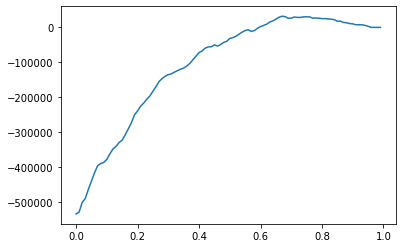

In [78]:
#横軸がthreshold（閾値）、縦軸が払戻金の合計
pd.Series(gain).plot()

簡単に言うと今回のthreshold（閾値）はme.predict_proba(X_test)で算出された3着以内に入る確率を0，1で判別するための閾値なので、閾値の値が低いほど、より多く3着以内にはいると予測し、閾値が大きいほど3着以内に入ると予測される数は絞られる。

展望：いまのところthreshold=0.75でプラス30290.0なので、今後よりプラスに持っていけるように複数モデルでの検証、データの拡充、特徴量選択などをしていく予定、また、深層学習も興味があるので扱っていきたい